<h1><b>Project 1</b></h1>
<h3>DAT 402</h3>
<h3>Joshua Gold</h3>

<p>This project uses the k-Nearest Neighbors algorithm to classify a dataset containing songs either by Drake or featuring Drake and includes various attributes about each song (vocals, loudness, tempo, etc..) and then uses KNN to determine if a song from the sample is by Drake or just has Drake featured in it.</p>

<h3>Imports</h3>

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import seaborn as sns

<h3>Read and Prepare Data</h3>

In [25]:
drake_data = pd.read_csv('drake-final.csv')

# Encoder for non-numerical column values
le = LabelEncoder()

# columns to change from categorial to numerical using labnel encoder
cat_data = ['name','album','type','release_date','feature','artist']
for x in cat_data:
    drake_data[x] = le.fit_transform(drake_data[x])

# make copy of data set drop na values
dataset = drake_data
dataset = dataset.dropna()

# Drop artist so it doesn't pick up on name codes
dataset = dataset.drop(columns='artist')

<H2>Dataset Preview</H2>

In [26]:
display(dataset)

,name,album,type,release_date,year,minutes,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,feature
0,0,0,3,36,2013,4.59,45,0.559,0.73700,0.559,0.716,0.000000,0.2520,-3.964,0.390,176.618,4,0
1,80,1,1,4,2013,6.23,24,0.587,0.18600,0.587,0.708,0.000000,0.1930,-4.492,0.190,145.103,4,1
2,16,2,3,40,2015,2.84,41,0.893,0.00854,0.893,0.480,0.000000,0.1160,-3.728,0.356,86.976,4,0
3,154,3,1,3,2012,3.40,41,0.639,0.02330,0.639,0.570,0.000000,0.3290,-4.966,0.042,92.073,4,1
4,17,4,1,29,2014,5.63,30,0.842,0.28100,0.842,0.482,0.000000,0.1110,-8.846,0.181,92.023,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,38,74,2,45,2015,5.24,31,0.522,0.13900,0.522,0.362,0.000028,0.1110,-10.827,0.048,135.797,4,0
215,29,74,2,45,2015,3.68,26,0.804,0.02040,0.804,0.334,0.000000,0.1180,-10.135,0.385,137.855,4,0
216,19,74,2,45,2015,3.63,32,0.769,0.00179,0.769,0.676,0.000000,0.2510,-6.480,0.277,131.938,4,0
217,3,74,2,45,2015,4.23,25,0.747,0.65300,0.747,0.621,0.000000,0.1240,-9.115,0.394,89.282,4,0


<h3>Main Code Section</h3>

In [27]:
# Split dataset into features and labels
# feature in this case is drake a feature in the song or is it his own song.
X = dataset.drop(columns=['feature'])
y = dataset['feature']

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=22)

# Normalize data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# list of kvalues to loop through for testing
k_value = list(range(1,41))

# loop grabbers
high_score = 0
high_accuracy_k = 0

# Score Lists
accuracy_scores = []
error_rate = []
train_scores = []
test_scores = []
mse_values = []
cv_scores = []
biases = []
variances = []

# Test KNN model
for i in k_value:
    classifier = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = (y_pred == y_test).sum() / len(y_test)
    accuracy_scores.append(accuracy)
    error_rate.append(np.mean(y_pred != y_test))
    scores_cv = cross_val_score(classifier, X, y, cv=10, scoring='accuracy')
    cv_scores.append(scores_cv.mean())
    bias = np.mean((np.mean(y_pred,axis=0)- y_test)**2)
    biases.append(bias)
    variance = np.mean(np.var(y_pred,axis=0))
    variances.append(variance)
    
    # Get highest accuracy K
    if accuracy > high_score:
        high_score = accuracy
        high_accuracy_k = i
    
    # train test scores and mse values
    train_scores.append(classifier.score(X_train, y_train))
    test_scores.append(classifier.score(X_test, y_test))
    mse_values.append(mean_squared_error(y_test, y_pred))

# print results (some)
print("Minimum Error: ", min(error_rate), " at K=",high_accuracy_k)
print("Max Accuracy: ", max(accuracy_scores), " at K=",high_accuracy_k)
print("Highest Accuracy at K=",high_accuracy_k)

# classification report k at highest accuracy & report
classifier = KNeighborsClassifier(n_neighbors=high_accuracy_k, metric='euclidean')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = (y_pred == y_test).sum() / len(y_test)
report = classification_report(y_test,y_pred,output_dict=True)
df_report = pd.DataFrame(report)
display(df_report.transpose())


Minimum Error:  0.022727272727272728  at K= 8
Max Accuracy:  0.9772727272727273  at K= 8
Highest Accuracy at K= 8


,precision,recall,f1-score,support
0,0.972222,1.000000,0.985915,35.000000
1,1.000000,0.888889,0.941176,9.000000
accuracy,0.977273,0.977273,0.977273,0.977273
macro avg,0.986111,0.944444,0.963546,44.000000
weighted avg,0.977904,0.977273,0.976764,44.000000


<h3>Plots</h3>

<h3>Accuracy Scores</h3>

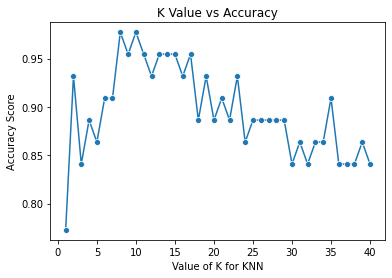

In [28]:
# Plot accuracy scores
sns.lineplot(x=k_value,y=accuracy_scores,marker='o')
plt.title("K Value vs Accuracy")
plt.xlabel('Value of K for KNN')
plt.ylabel("Accuracy Score")
plt.show()

<h3>Error Rate</h3>

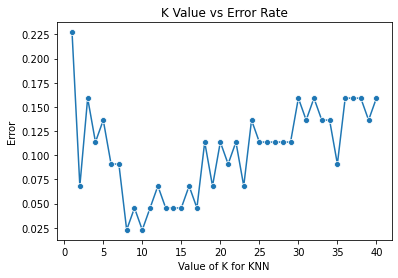

In [29]:
# Plot error rate for each k=
sns.lineplot(x=k_value,y=error_rate,marker='o')
plt.title("K Value vs Error Rate")
plt.xlabel('Value of K for KNN')
plt.ylabel("Error")
plt.show()

<h3>Cross Validation Accuracy Scores</h3>

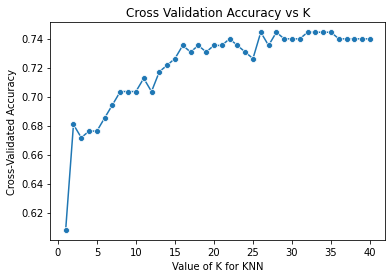

In [30]:
# plot cross validation accuracy scores
sns.lineplot(x=k_value,y=cv_scores,marker='o')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title("Cross Validation Accuracy vs K")
plt.show()

<h3>Training and Testing Scores over K</h3>

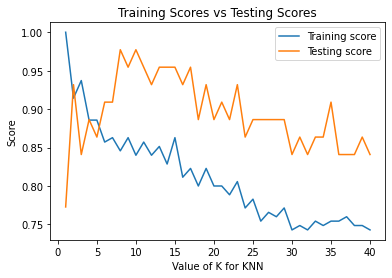

In [31]:
# Plot of the training and testing score
plt.plot(k_value, train_scores, label="Training score")
plt.plot(k_value, test_scores, label="Testing score")
plt.xlabel('Value of K for KNN')
plt.ylabel("Score")
plt.title("Training Scores vs Testing Scores")
plt.legend()
plt.show()


<h3>Bias, Variance and MSE over K</h3>

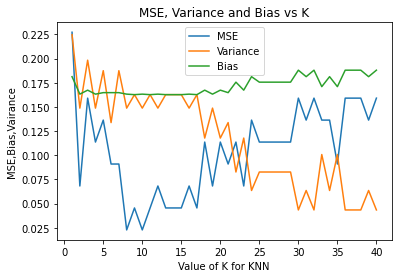

In [32]:
# plot bias and vairance and mse with k
plt.plot(k_value,mse_values,label="MSE")
plt.plot(k_value,variances,label="Variance")
plt.plot(k_value,biases,label="Bias")
plt.xlabel('Value of K for KNN')
plt.ylabel("MSE,Bias,Vairance")
plt.title("MSE, Variance and Bias vs K")
plt.legend()
plt.show()

<h2>Results</h2>
<p>The value for K that had the best results (lowest error rate and highest accuracy score) was at <b>k=8</b>
<ul>
<li>Minimum Error: 0.022727272727272728</li>
<li>Max Accuracy: 0.9772727272727273</li>
<li>Highest Accuracy at k= 8</li>
</ul>
</p>
<p>
The Plots show the various values calculated for each iteration of the knn loop in the main code and the variable being compared for each K
In the plot 'K-value vs Error Rate' it shows that the model gains accuracy after each increase in the value for k, and around k=8 and k=10 the model gets more accurate and then as the value increases the accuracy of the model goes down.

The model also shows that with pretty good accuracy it can actually predict if the song in the dataset was released by Drake rather than a song that features him.
</p>

<h2>Dataset and Sources</h2>
<p>Drake Song Details Dataset<p>
<p>Source <a>https://github.com/erikgregorywebb/datasets/blob/master/drake-final.csv</a></p>